In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataset = np.load('results/bilinear_results_035.npy', allow_pickle=True)

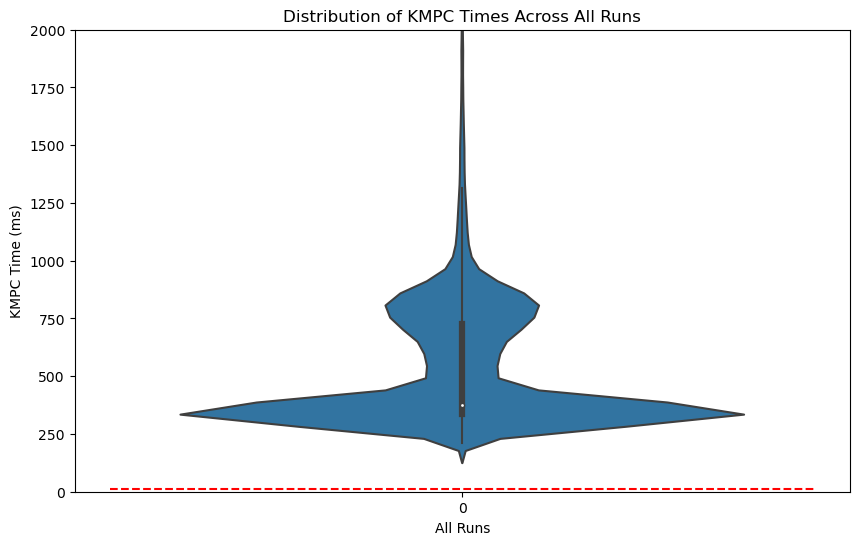

In [14]:
# dataset is a list of results from different runs. Each run is represented as a dictionary with keys:
# 'state_data', 'state_data_xy', 'control_data', 'poserrsq_data', 'MPC_cost_data', 'kmpc_times', 'mu_t', 'init_config'

# Plot the kmpc_times for all of the runs on a single seaborn violin plot
# Plot the times in milliseconds
kmpc_times = [run['kmpc_times'] for run in dataset]
kmpc_times_flat = [item for sublist in kmpc_times for item in sublist]
kmpc_times_flat = [time * 1000 for time in kmpc_times_flat]  # Convert to milliseconds

plt.figure(figsize=(10, 6))
sns.violinplot(data=kmpc_times_flat)
plt.title('Distribution of KMPC Times Across All Runs')
plt.ylabel('KMPC Time (ms)')
plt.xlabel('All Runs')
# Set y-axis to be between 0 and 2 seconds
plt.ylim(0, 2000)
plt.hlines(10, xmin=-0.5, xmax=0.5, colors='r', linestyles='dashed', label='10 ms threshold')

In [19]:
# Print the mean kmpc time
mean_time = np.mean(kmpc_times_flat)
print(f'Mean KMPC Time: {mean_time:.2f} ms')
# Print the median kmpc time
median_time = np.median(kmpc_times_flat)
print(f'Median KMPC Time: {median_time:.2f} ms')

Mean KMPC Time: 534.63 ms
Median KMPC Time: 377.44 ms


## Least Squares

In [1]:
import numpy as np

data_arr = np.load('data_fromtraj/random/Fx_10_4550091_combined.npy')
print(data_arr.shape)

(4550091, 10, 6)


In [3]:
x_minus = data_arr[:,0,:].T
x_plus = data_arr[:,1,:].T
A = x_plus @ np.linalg.pinv(x_minus)
print('A shape:',A.shape)
print('A:',A)
np.save('data_fromtraj/random/A_nolift.npy',A)

A shape: (6, 6)
A: [[ 1.00471256e+00  8.91936777e-03 -4.62730257e-02  5.05601363e-07
   9.52551839e-02  6.32216594e-04]
 [-2.11678083e-05  9.93743543e-01 -2.95012546e-04  3.99388455e-03
   1.55956717e-04  5.02193295e-02]
 [ 7.90798008e-03  7.49208582e-03  9.21317804e-01 -1.03016732e-05
   9.56711802e-02  2.54241669e-04]
 [ 9.33066625e-04 -2.03867664e-01 -1.67975703e-02  1.13859246e+00
   6.58653238e-03  5.25160377e-01]
 [ 2.60791771e-02  4.96733103e-02 -2.43108633e-01  5.66742285e-06
   4.42195986e-01  3.48473342e-03]
 [-8.24596958e-05 -3.62333667e-02 -1.72157595e-03  2.31782080e-02
   8.37632040e-04  1.81387325e-01]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
data_str = 'data_horizontal_large/random/Fx_10_805359_combined'
data = np.load(data_str+'.npy')
num_states = data.shape[2]
number_of_trajectories = data.shape[0]
number_of_timesteps = data.shape[1]

FileNotFoundError: [Errno 2] No such file or directory: 'data_horizontal_large/random/Fx_10_805359_combined.npy'

(2546091, 3, 12)


KeyboardInterrupt: 

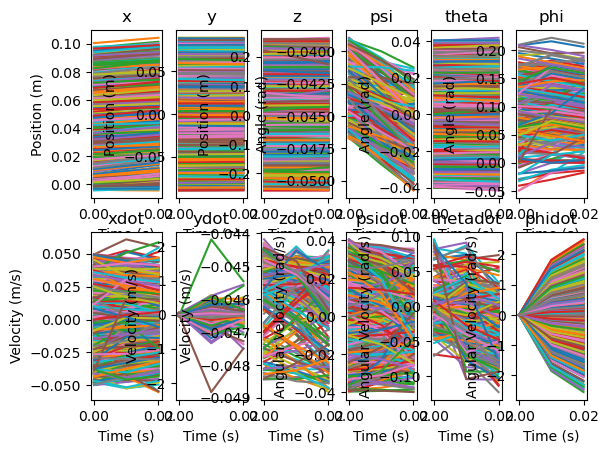

In [2]:
print(data.shape)
traj_len = data.shape[1]
dt = 0.01
plot_data = data
fig,axs = plt.subplots(nrows=2,ncols=6)
axs[0,0].set_title('x')
axs[0,0].set_xlabel('Time (s)')
axs[0,0].set_ylabel('Position (m)')
axs[0,1].set_title('y')
axs[0,1].set_xlabel('Time (s)')
axs[0,1].set_ylabel('Position (m)')
axs[0,2].set_title('z')
axs[0,2].set_xlabel('Time (s)')
axs[0,2].set_ylabel('Position (m)')
axs[0,3].set_title('psi')
axs[0,3].set_xlabel('Time (s)')
axs[0,3].set_ylabel('Angle (rad)')
axs[0,4].set_title('theta')
axs[0,4].set_xlabel('Time (s)')
axs[0,4].set_ylabel('Angle (rad)')
axs[0,5].set_title('phi')
axs[0,5].set_xlabel('Time (s)')
axs[0,5].set_ylabel('Angle (rad)')
axs[1,0].set_title('xdot')
axs[1,0].set_xlabel('Time (s)')
axs[1,0].set_ylabel('Velocity (m/s)')
axs[1,1].set_title('ydot')
axs[1,1].set_xlabel('Time (s)')
axs[1,1].set_ylabel('Velocity (m/s)')
axs[1,2].set_title('zdot')
axs[1,2].set_xlabel('Time (s)')
axs[1,2].set_ylabel('Velocity (m/s)')
axs[1,3].set_title('psidot')
axs[1,3].set_xlabel('Time (s)')
axs[1,3].set_ylabel('Angular Velocity (rad/s)')
axs[1,4].set_title('thetadot')
axs[1,4].set_xlabel('Time (s)')
axs[1,4].set_ylabel('Angular Velocity (rad/s)')
axs[1,5].set_title('phidot')
axs[1,5].set_xlabel('Time (s)')
axs[1,5].set_ylabel('Angular Velocity (rad/s)')
for i in range(plot_data.shape[0]):
    axs[0,0].plot(dt*np.arange(traj_len),plot_data[i,:,0])
    axs[0,1].plot(dt*np.arange(traj_len),plot_data[i,:,1])
    axs[0,2].plot(dt*np.arange(traj_len),plot_data[i,:,2])
    axs[0,3].plot(dt*np.arange(traj_len),plot_data[i,:,3])
    axs[0,4].plot(dt*np.arange(traj_len),plot_data[i,:,4])
    axs[0,5].plot(dt*np.arange(traj_len),plot_data[i,:,5])
    axs[1,0].plot(dt*np.arange(traj_len),plot_data[i,:,6])
    axs[1,1].plot(dt*np.arange(traj_len),plot_data[i,:,7])
    axs[1,2].plot(dt*np.arange(traj_len),plot_data[i,:,8])
    axs[1,3].plot(dt*np.arange(traj_len),plot_data[i,:,9])
    axs[1,4].plot(dt*np.arange(traj_len),plot_data[i,:,10])
    axs[1,5].plot(dt*np.arange(traj_len),plot_data[i,:,11])
plt.show()

## Remove Unstable Trajectories

In [4]:
data = np.load('data/random/Fx_10_3750085_combined_body_vel_noxy.npy')
index_valid = np.where(np.any(data > 1e1, axis=(1,2)))
index_valid_2 = np.where(np.any(data < 1e2, axis=(1,2)))

In [5]:
index_valid = np.where(np.any(data > 1e1, axis=(1,2)))
index_valid_2 = np.where(np.any(data < 1e2, axis=(1,2)))

In [6]:
print(data.shape)
data_reduced = np.delete(data, index_valid, axis=0)
print(data_reduced.shape)

(2499647, 10, 5)
(2499647, 10, 5)


In [17]:
data_invalid = data[index_valid]

(805359, 10, 12)


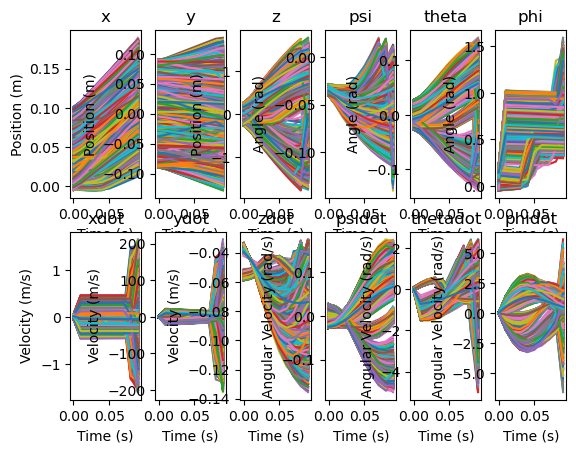

In [18]:
print(data.shape)
traj_len = data.shape[1]
dt = 0.01
plot_data = data_invalid
fig,axs = plt.subplots(nrows=2,ncols=6)
axs[0,0].set_title('x')
axs[0,0].set_xlabel('Time (s)')
axs[0,0].set_ylabel('Position (m)')
axs[0,1].set_title('y')
axs[0,1].set_xlabel('Time (s)')
axs[0,1].set_ylabel('Position (m)')
axs[0,2].set_title('z')
axs[0,2].set_xlabel('Time (s)')
axs[0,2].set_ylabel('Position (m)')
axs[0,3].set_title('psi')
axs[0,3].set_xlabel('Time (s)')
axs[0,3].set_ylabel('Angle (rad)')
axs[0,4].set_title('theta')
axs[0,4].set_xlabel('Time (s)')
axs[0,4].set_ylabel('Angle (rad)')
axs[0,5].set_title('phi')
axs[0,5].set_xlabel('Time (s)')
axs[0,5].set_ylabel('Angle (rad)')
axs[1,0].set_title('xdot')
axs[1,0].set_xlabel('Time (s)')
axs[1,0].set_ylabel('Velocity (m/s)')
axs[1,1].set_title('ydot')
axs[1,1].set_xlabel('Time (s)')
axs[1,1].set_ylabel('Velocity (m/s)')
axs[1,2].set_title('zdot')
axs[1,2].set_xlabel('Time (s)')
axs[1,2].set_ylabel('Velocity (m/s)')
axs[1,3].set_title('psidot')
axs[1,3].set_xlabel('Time (s)')
axs[1,3].set_ylabel('Angular Velocity (rad/s)')
axs[1,4].set_title('thetadot')
axs[1,4].set_xlabel('Time (s)')
axs[1,4].set_ylabel('Angular Velocity (rad/s)')
axs[1,5].set_title('phidot')
axs[1,5].set_xlabel('Time (s)')
axs[1,5].set_ylabel('Angular Velocity (rad/s)')
for i in range(plot_data.shape[0]):
    axs[0,0].plot(dt*np.arange(traj_len),plot_data[i,:,0])
    axs[0,1].plot(dt*np.arange(traj_len),plot_data[i,:,1])
    axs[0,2].plot(dt*np.arange(traj_len),plot_data[i,:,2])
    axs[0,3].plot(dt*np.arange(traj_len),plot_data[i,:,3])
    axs[0,4].plot(dt*np.arange(traj_len),plot_data[i,:,4])
    axs[0,5].plot(dt*np.arange(traj_len),plot_data[i,:,5])
    axs[1,0].plot(dt*np.arange(traj_len),plot_data[i,:,6])
    axs[1,1].plot(dt*np.arange(traj_len),plot_data[i,:,7])
    axs[1,2].plot(dt*np.arange(traj_len),plot_data[i,:,8])
    axs[1,3].plot(dt*np.arange(traj_len),plot_data[i,:,9])
    axs[1,4].plot(dt*np.arange(traj_len),plot_data[i,:,10])
    axs[1,5].plot(dt*np.arange(traj_len),plot_data[i,:,11])
plt.show()

In [22]:
np.save(data_str+'_reduced_'+str(data_reduced.shape[0]), data_reduced)

(6326, 10, 12)


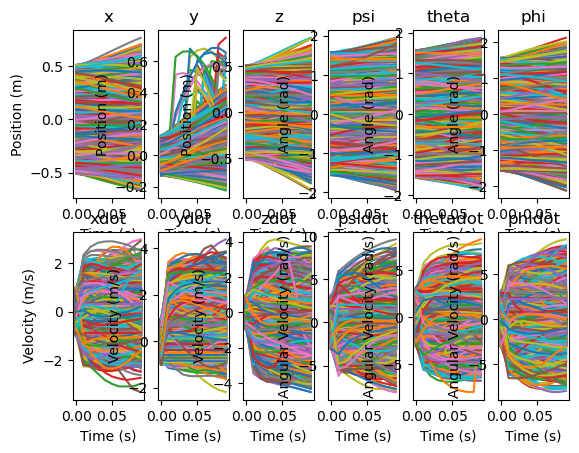

In [6]:
print(data.shape)
traj_len = data.shape[1]
dt = 0.01
plot_data = data_reduced
fig,axs = plt.subplots(nrows=2,ncols=6)
axs[0,0].set_title('x')
axs[0,0].set_xlabel('Time (s)')
axs[0,0].set_ylabel('Position (m)')
axs[0,1].set_title('y')
axs[0,1].set_xlabel('Time (s)')
axs[0,1].set_ylabel('Position (m)')
axs[0,2].set_title('z')
axs[0,2].set_xlabel('Time (s)')
axs[0,2].set_ylabel('Position (m)')
axs[0,3].set_title('psi')
axs[0,3].set_xlabel('Time (s)')
axs[0,3].set_ylabel('Angle (rad)')
axs[0,4].set_title('theta')
axs[0,4].set_xlabel('Time (s)')
axs[0,4].set_ylabel('Angle (rad)')
axs[0,5].set_title('phi')
axs[0,5].set_xlabel('Time (s)')
axs[0,5].set_ylabel('Angle (rad)')
axs[1,0].set_title('xdot')
axs[1,0].set_xlabel('Time (s)')
axs[1,0].set_ylabel('Velocity (m/s)')
axs[1,1].set_title('ydot')
axs[1,1].set_xlabel('Time (s)')
axs[1,1].set_ylabel('Velocity (m/s)')
axs[1,2].set_title('zdot')
axs[1,2].set_xlabel('Time (s)')
axs[1,2].set_ylabel('Velocity (m/s)')
axs[1,3].set_title('psidot')
axs[1,3].set_xlabel('Time (s)')
axs[1,3].set_ylabel('Angular Velocity (rad/s)')
axs[1,4].set_title('thetadot')
axs[1,4].set_xlabel('Time (s)')
axs[1,4].set_ylabel('Angular Velocity (rad/s)')
axs[1,5].set_title('phidot')
axs[1,5].set_xlabel('Time (s)')
axs[1,5].set_ylabel('Angular Velocity (rad/s)')
for i in range(plot_data.shape[0]):
    axs[0,0].plot(dt*np.arange(traj_len),plot_data[i,:,0])
    axs[0,1].plot(dt*np.arange(traj_len),plot_data[i,:,1])
    axs[0,2].plot(dt*np.arange(traj_len),plot_data[i,:,2])
    axs[0,3].plot(dt*np.arange(traj_len),plot_data[i,:,3])
    axs[0,4].plot(dt*np.arange(traj_len),plot_data[i,:,4])
    axs[0,5].plot(dt*np.arange(traj_len),plot_data[i,:,5])
    axs[1,0].plot(dt*np.arange(traj_len),plot_data[i,:,6])
    axs[1,1].plot(dt*np.arange(traj_len),plot_data[i,:,7])
    axs[1,2].plot(dt*np.arange(traj_len),plot_data[i,:,8])
    axs[1,3].plot(dt*np.arange(traj_len),plot_data[i,:,9])
    axs[1,4].plot(dt*np.arange(traj_len),plot_data[i,:,10])
    axs[1,5].plot(dt*np.arange(traj_len),plot_data[i,:,11])
plt.show()

## Reshape into single steps

In [3]:
reshape_data_str = 'data/random/Fx_10_9450189_combined_nopos.npy'
data = np.load(reshape_data_str)
num_states = 5

In [4]:
shifted_arrays = [data]
# shift trajectories by one time step
new_traj_len = 2
for roll_index in range(1,new_traj_len):
    shifted_array = np.roll(data, -(roll_index), axis=1)
    shifted_arrays.append(shifted_array)
#shifted_array = np.roll(data, -1, axis=1)

# stack original and shifted arrays along new axis
stacked_array = np.stack(shifted_arrays, axis=2)
#stacked_array = np.stack((data, stacked_shifted_arrays), axis=2)
#stacked_array = np.stack((data, shifted_array), axis=2)

# remove last time step from each trajectory
#stacked_array = stacked_array[:, :-1, :, :]
stacked_array = stacked_array[:, :-(new_traj_len-1), :, :]

# reshape array to desired shape
#new_array = stacked_array.reshape(-1, 2, num_states)
new_array = stacked_array.reshape(-1, new_traj_len, num_states)

print('old array shape:', data.shape)
print('new_array shape:', new_array.shape)

old array shape: (9450189, 10, 5)
new_array shape: (85051701, 2, 5)


In [30]:
# For testing the above code
print(data[0,:,0])
for i in range(10):
    print(new_array[i,:,0])

[0.07889358 0.07969327 0.08040722 0.08103494 0.08241543 0.0865576
 0.0912883  0.09594038 0.10051261 0.10500411]
[0.07889358 0.07969327 0.08040722]
[0.07969327 0.08040722 0.08103494]
[0.08040722 0.08103494 0.08241543]
[0.08103494 0.08241543 0.0865576 ]
[0.08241543 0.0865576  0.0912883 ]
[0.0865576  0.0912883  0.09594038]
[0.0912883  0.09594038 0.10051261]
[0.09594038 0.10051261 0.10500411]
[0.06761309 0.07168101 0.07698373]
[0.07168101 0.07698373 0.08220679]


In [5]:
np.save(reshape_data_str.replace('.npy', '_reshaped.npy'), new_array)

# Join Data Together

In [2]:
import numpy as np
data1 = np.load('data_horizontal_large/random/Fx_10_57204.npy')
data2 = np.load('data_horizontal_large/random/Fx_10_346384_26.npy')
data3 = np.load('data_horizontal_large/random/Fx_10_401771_42.npy')
#data3 = np.load('data/random/seed0/Fx_10_6326_reduced_6322.npy')
#data4 = np.load('data/random/seed26/Fx_10_6073.npy')
data_list = [data1,data2,data3]

FileNotFoundError: [Errno 2] No such file or directory: 'data_horizontal_large/random/Fx_10_57204.npy'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
data_list = []
for count, data_file in enumerate(glob('data/Fx_5*.npy')):
    if count % 4 == 0:
        data_list.append(np.load(data_file))

In [2]:
combined_data = np.concatenate(data_list, axis=0)
print(combined_data.shape)

(5350107, 5, 8)


In [3]:
combined_data[0,:,:]

array([[-3.68341258e-03, -7.34442362e-03,  9.08292244e-02,
         9.84167482e-01,  2.47653346e-01,  6.39814655e-02,
         4.58993122e-03,  4.36249915e-02],
       [ 2.33090440e-02, -3.70898111e-04,  9.14535735e-02,
         9.92971405e-01,  1.87093348e-01,  4.83357352e-02,
         8.70144848e-03,  3.15853554e-01],
       [ 4.37006764e-02,  4.89729852e-03,  9.25376838e-02,
         1.03222190e+00,  1.41342890e-01,  3.65160632e-02,
        -9.94523000e-03,  3.57404277e-01],
       [ 5.91064844e-02,  8.87740290e-03,  9.17601212e-02,
         1.07544608e+00,  1.06778578e-01,  2.75863419e-02,
        -9.32828849e-03,  2.29655446e-01],
       [ 7.07449756e-02,  1.18842176e-02,  9.05901195e-02,
         1.10497417e+00,  8.06665781e-02,  2.08402832e-02,
        -6.48688759e-03,  3.63178922e-01]])

In [9]:
data_old = np.load('data/random/Fx_10_2500050_combined_old.npy')

In [4]:
np.save('data/random/Fx_'+str(combined_data.shape[1])+'_'+str(combined_data.shape[0])+'_combined.npy', combined_data)

In [9]:
print(np.min(combined_data, axis=(0,1)))

[-0.00441499 -0.01062483 -0.34889239 -0.06599349 -0.00859518 -0.2714939
 -0.09901529 -0.04985562]


In [6]:
print(combined_data.shape)
traj_len = combined_data.shape[1]
dt = 0.01
plot_data = combined_data
fig,axs = plt.subplots(nrows=2,ncols=4)
for i in range(plot_data.shape[0]):
    axs[0,0].plot(dt*np.arange(traj_len),plot_data[i,:,0])
    axs[0,1].plot(dt*np.arange(traj_len),plot_data[i,:,1])
    axs[0,2].plot(dt*np.arange(traj_len),plot_data[i,:,2])
    axs[0,3].plot(dt*np.arange(traj_len),plot_data[i,:,3])
    axs[1,0].plot(dt*np.arange(traj_len),plot_data[i,:,4])
    axs[1,1].plot(dt*np.arange(traj_len),plot_data[i,:,5])
    axs[1,2].plot(dt*np.arange(traj_len),plot_data[i,:,6])
    axs[1,3].plot(dt*np.arange(traj_len),plot_data[i,:,7])
plt.show()

(48016, 10, 8)


KeyboardInterrupt: 

# Testing

In [9]:
number_of_trajectories = 3
length_of_trajectories = 3
num_states = 2
data_test = np.zeros((number_of_trajectories,length_of_trajectories,num_states))
rng = np.random.default_rng()
rand_num_arr = rng.choice(np.arange(0,10), size = number_of_trajectories, replace=False)
rand_num = rand_num_arr[0]
data_test[0,:,:] = np.array([[rand_num,rand_num*10],[(rand_num+1),(rand_num+1)*10],[(rand_num+2),(rand_num+2)*10]])
rand_num = rand_num_arr[1]
data_test[1,:,:] = np.array([[rand_num,rand_num*10],[(rand_num+1),(rand_num+1)*10],[(rand_num+2),(rand_num+2)*10]])
rand_num = rand_num_arr[2]
data_test[2,:,:] = np.array([[rand_num,rand_num*10],[(rand_num+1),(rand_num+1)*10],[(rand_num+2),(rand_num+2)*10]])

In [16]:
# shift trajectories by one time step
shifted_array = np.roll(data_test, -1, axis=1)

# stack original and shifted arrays along new axis
stacked_array = np.stack((data_test, shifted_array), axis=2)

# remove last time step from each trajectory
stacked_array = stacked_array[:, :-1, :, :]

# reshape array to desired shape
new_array = stacked_array.reshape(-1, 2, num_states)

# Remove position

In [2]:
data_str = 'data/random/Fx_10_5748130_combined'
data = np.load(data_str+'.npy')
print(data.shape)
data_noposition = data[:,:,3:] # remove position data x,y,theta
print(data_noposition.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'data/random/Fx_10_5748130_combined.npy'

In [4]:
data_str = 'data/random/Fx_10_3300066_combined'
data = np.load(data_str+'.npy')
print(data.shape)
data_noposition = data[:,:,3:] # remove position data x,y,theta
print(data_noposition.shape)


(3300066, 10, 8)
(3300066, 10, 5)


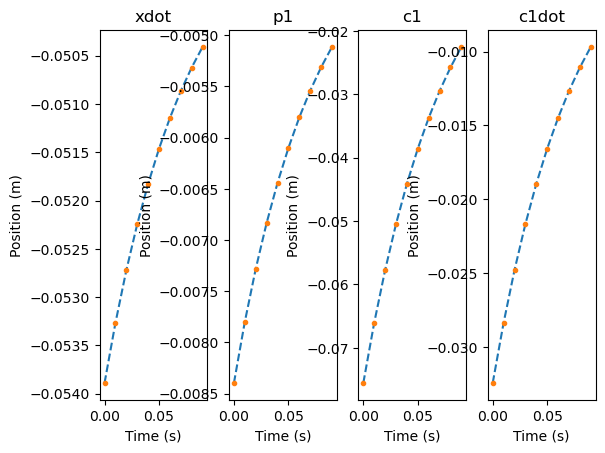

In [5]:
# Plot the first trajectory from data and data_noposition
import matplotlib.pyplot as plt
dt = 0.01
traj_len = data.shape[1]
fig,axs = plt.subplots(nrows=1,ncols=4)
states = ['xdot','p1','c1','c1dot']
for i in range(4):
    axs[i].plot(dt*np.arange(traj_len),data[0,:,i+3],'--')
    axs[i].set_title(states[i])
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Position (m)')
    axs[i].plot(dt*np.arange(traj_len),data_noposition[0,:,i],'.')
    axs[i].set_title(states[i])
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Position (m)')


In [6]:
np.save(data_str+'_nopos.npy', data_noposition)

# Convert to body frame velocities

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from planar_pusher import Pusher

In [4]:
theta = np.deg2rad(-40)
empty_pusher = Pusher()
empty_pusher.Convert_to_body_vel(np.array([[0,0,theta,0,0,1,0,0],[0,0,theta,0,0,1,0,0]]))
#empty_pusher.Convert_to_xy_vel(np.array([[0,0,theta,0,0,1,0,0],[0,0,theta,0,0,1,0,0]]))

[array([ 0.        ,  0.        , -0.6981317 ,  0.        ,  0.        ,
         0.76604444,  0.64278761,  0.        ]),
 array([ 0.        ,  0.        , -0.6981317 ,  0.        ,  0.        ,
         0.76604444,  0.64278761,  0.        ])]

In [22]:
data_str = 'data/random/Fx_10_3300066_combined'
data = np.load(data_str+'.npy')
print(data.shape)
empty_pusher = Pusher()
body_vel_data = np.zeros(data.shape)
for traj_ind in range(data.shape[0]):
    if traj_ind % 10000 == 0:
        print(traj_ind)
    traj = data[traj_ind,:,:]
    body_vel_traj = empty_pusher.Convert_to_body_vel(traj)
    body_vel_data[traj_ind,:,:] = body_vel_traj

(3300066, 10, 8)
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1

In [23]:
np.save(data_str+'_body_vel.npy', body_vel_data)

In [8]:
data_str = 'data/random/Fx_10_3750085_combined'
data = np.load(data_str+'.npy')
body_vel_data = np.load(data_str+'_body_vel.npy')
print(np.all(data == body_vel_data))

False


# Visualize Training Data

In [1]:
def plot_training_points(self, training_data,reference_traj,dt=0.01,show=True):
    """Plots a trajectory of the planar pusher model as line graphs.
    Inputs:
    - training_data: a numpy array of shape (num_trajectories, trajectory_length, num_states)
    - reference_traj: a numpy array of shape (trajectory_length, num_states) representing the reference trajectory"""
    fig, axs = plt.subplots(2, 3)
    t = np.arange(0, reference_traj.shape[0]*dt, dt)
    state_names = ['x', 'x_dot', 'p1', 'c1', 'c1_dot']
    for i in range(2):
        for j in range(3):
            if 3*i+j >= reference_traj.shape[1]:
                break
            axs[i, j].plot(t, reference_traj[:, 3*i+j])
            axs[i, j].set_title(state_names[3*i+j])
    if show:
        plt.show()

In [2]:
ref_trajectory = np.load('pusher_trajectory.npy')


NameError: name 'np' is not defined

In [7]:
0.045+0.09/7

0.05785714285714286

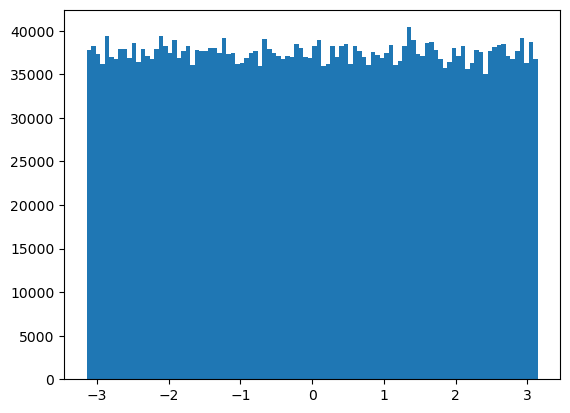

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = np.load('data_fromtraj/random/Fx_10_4550091_combined.npy')
data = np.load('data/random/Fx_10_3750075_combined.npy')
p1_data = data[:,0,3].flatten()
plt.hist(p1_data, bins=100)
plt.show()


In [11]:
p1_data = data[:,:,0]
p1dt_data = data[:,:,2]*0.01
p2_data = data[:,:,1]
p2dt_data = data[:,:,3]*0.01

# Calculate the change in p1 and p2 over time for each trajectory
# p1_data is in the shape (num_trajectories, trajectory_length)
# p2_data is in the shape (num_trajectories, trajectory_length)
# p1_change is in the shape (num_trajectories,trajectory_length-1)
p1_change = np.diff(p1_data, axis=1)
p2_change = np.diff(p2_data, axis=1)


# Plot Results

## Plot State Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
max_timesteps = 300
num_states = 8
#max_timesteps = 100
conduit_traj = np.zeros((max_timesteps,num_states))
conduit_traj_half_x = np.arange(0,max_timesteps/2)*0.001
conduit_traj_x = list(conduit_traj_half_x) + list(reversed(conduit_traj_half_x))
conduit_traj[:,0] = np.array(conduit_traj_x)

# conduit_traj = np.zeros((max_timesteps,num_states))
# conduit_traj[:,0] = np.arange(0,max_timesteps)*0.001

In [10]:
state_strings = ['results/Q1/dual_no_err_thorizon9_state_data.npy','results/Q2/dual_no_err_thorizon9_state_data.npy','results/Q3/dual_no_err_thorizon9_state_data.npy','results/body_ref/dual_no_err_thorizon9_state_data.npy']

In [4]:
state_strings = ['results/Q1/pos_err_thorizon9_state_data.npy','results/Q2/pos_err_thorizon9_state_data.npy','results/Q3/pos_err_thorizon9_state_data.npy','results/body_ref/pos_err_thorizon9_state_data.npy']

In [16]:
state_data.shape

(300, 8)

In [12]:
state_strings = ['pusher_trajectory.npy']

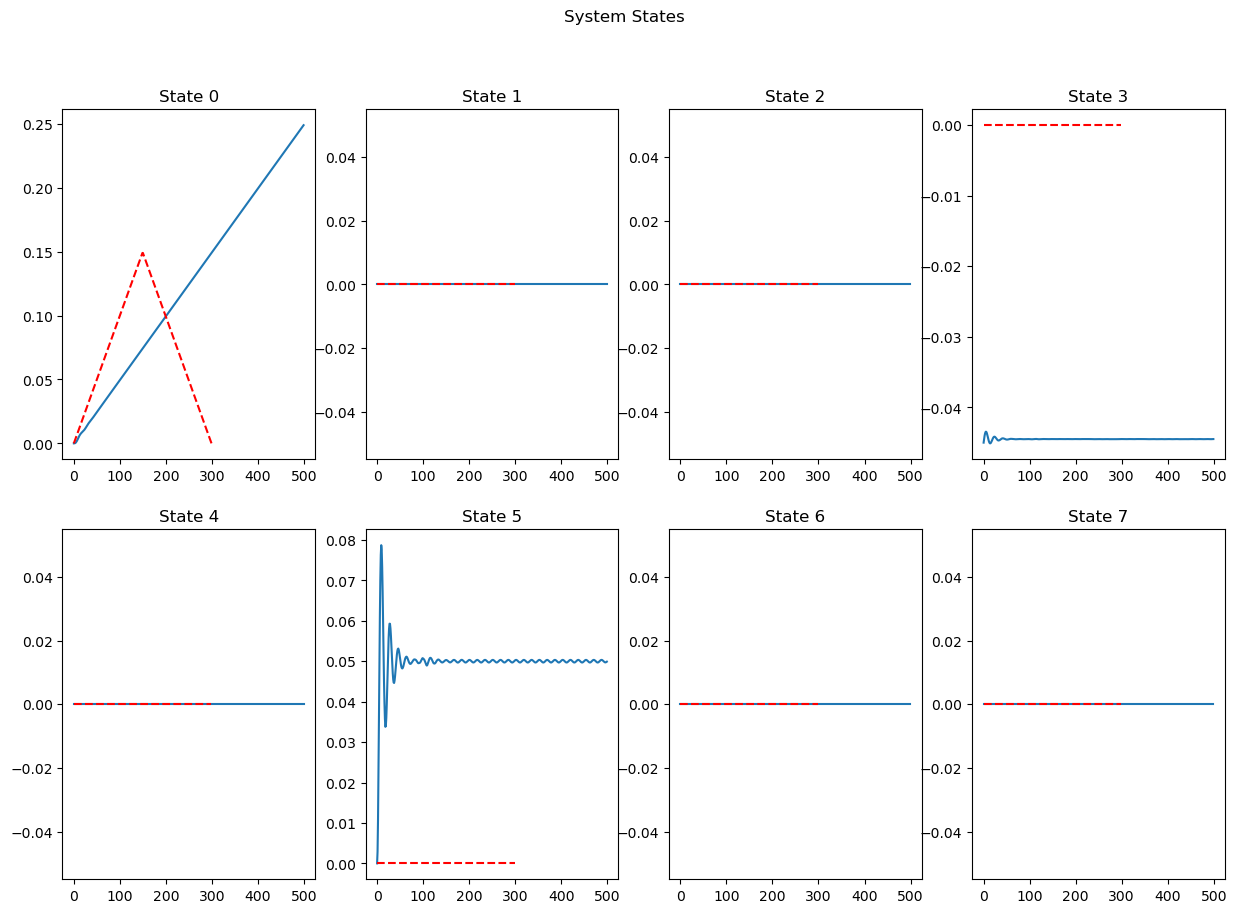

In [16]:
fig, axs = plt.subplots(2,4, figsize=(15, 10))
fig.suptitle('System States')
for state_str in state_strings:
    for i in range(num_states):
        state_data = np.load(state_str)
        axs[i//4, i%4].plot(state_data[:,i],label=state_str)
        axs[i//4, i%4].set_title('State ' + str(i))
        # Plot x_ref as well
        axs[i//4, i%4].plot(conduit_traj[:,i], color='r', linestyle='--')
        if i == range(num_states)[-1]:
            ax = plt.gca()
    # Plot when the state was uncontrolled
#plt.show()
handles, labels = ax.get_legend_handles_labels()
#plt.legend(handles=[handles[0], handles[1], handles[2],handles[3]], labels=['Q1','Q2', 'Q3','Body ref'])
plt.show()
